<a href="https://colab.research.google.com/github/viviennejuma/Students-Alcohol-Consumption/blob/main/Team_2_2021_02_Final_Project_Python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TEAM 2 FINAL PROJECT** 






In [ ]:
#import the libraries necessary for analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##**Data Preparation** 

In [ ]:
# Upload the datasets to be analyzed in csv form 
# First clean the Portugese Student dataset of duplicates and null values 
# Then format the data for use in analysis  

In [ ]:
#Importing portugese student dataset 
portugal = pd.read_csv("student-por.csv")
portugal.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


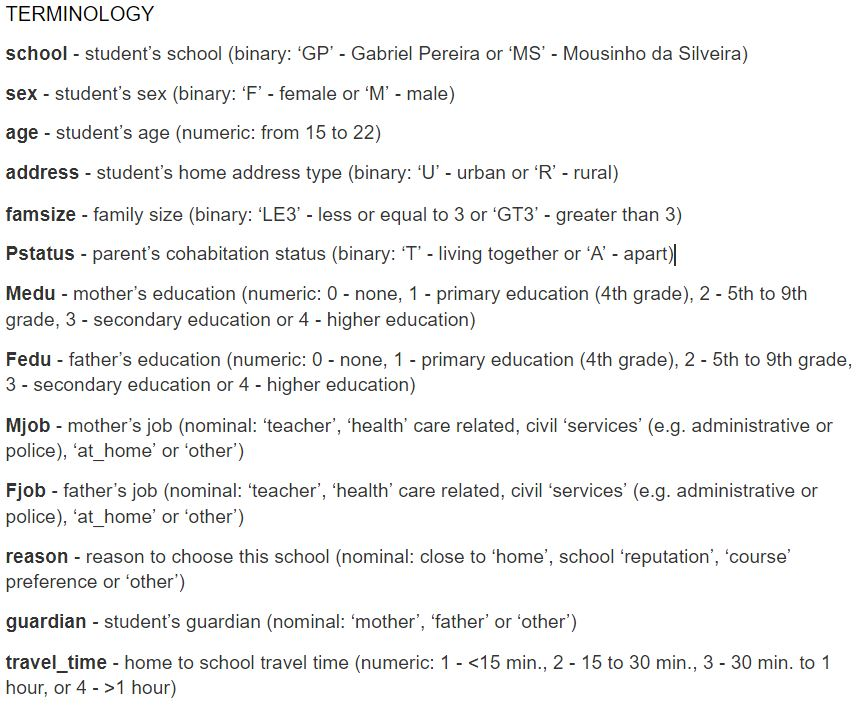

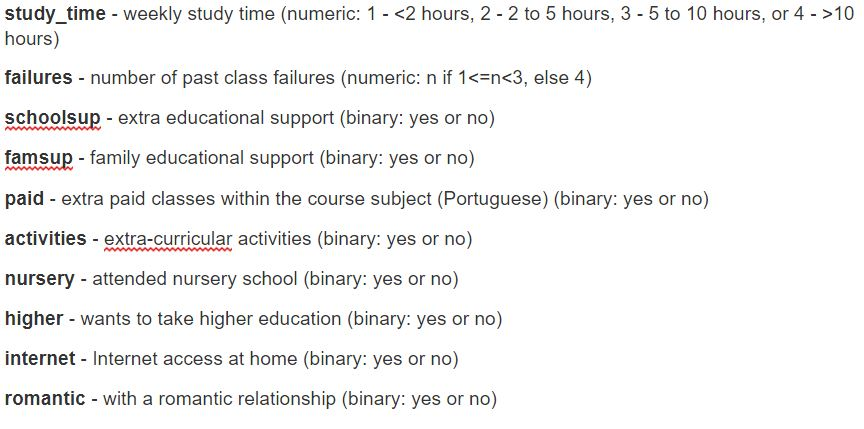

In [ ]:
# Looking for missing values within the dataset 
portugal.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
#Add new column 'objecting' with a counter  
lista = []
for i in range(649):
  lista.append(i)
portugal["objecting"] = lista
portugal.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,objecting
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,4
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,5
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,7
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,8
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,9


In [ ]:
# dropping duplicate rows
portugal = portugal.drop_duplicates()
portugal.shape

(649, 34)

In [ ]:
# look at datatypes
portugal.dtypes 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
objecting      int64
dtype: object

In [ ]:
# check accuracy
x = portugal["G1"].max()
print(x)
y = portugal["G2"].max()
print(y)
z = portugal["G3"].max()
print(z)

19
19
19


In [ ]:
# merge Grade columns
x = portugal["G1"] + portugal["G2"] + portugal["G3"]
portugal["Grade"] = x / 3
portugal["Grade"] = portugal["Grade"].round(2)
portugal.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,objecting,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0,7.33
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1,10.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,2,12.33
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,3,14.00
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,4,12.33


In [ ]:
#  drop columns
portugal.drop(["G1", "G2", "G3", "Mjob", "Fjob", "nursery"], axis=1, inplace= True)
portugal.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,objecting,Grade
0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,7.33
1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,1,10.33
2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,2,12.33
3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,3,14.00
4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,4,12.33
5,GP,M,16,U,LE3,T,4,3,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,no,5,4,2,1,2,5,6,5,12.33
6,GP,M,16,U,LE3,T,2,2,home,mother,1,2,0,no,no,no,no,yes,yes,no,4,4,4,1,1,3,0,6,12.67
7,GP,F,17,U,GT3,A,4,4,home,mother,2,2,0,yes,yes,no,no,yes,no,no,4,1,4,1,1,1,2,7,12.00
8,GP,M,15,U,LE3,A,3,2,home,mother,1,2,0,no,yes,no,no,yes,yes,no,4,2,2,1,1,1,0,8,16.00
9,GP,M,15,U,GT3,T,3,4,home,mother,1,2,0,no,yes,no,yes,yes,yes,no,5,5,1,1,1,5,0,9,12.33


In [ ]:
# uniformity of columns
portugal.columns = portugal.columns.str.lower()
portugal.head()


,school,sex,age,address,famsize,pstatus,medu,fedu,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,objecting,grade
0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,7.33
1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,1,10.33
2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,2,12.33
3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,3,14.00
4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,4,12.33


In [ ]:
# renaming columns
portugal.columns = ["school", "sex", "age", "address", "fam_size", "p_status", "m_edu", "f_edu", "reason", "guardian", "travel_time", "study_time", "failures", "school_sup", "fam_sup", "paid", "activities", "higher", "internet", "romantic", "fam_rel", "free_time", "go_out", "dalc", "walc", "health", "absences", "objecting", "grade"]
portugal.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,higher,internet,romantic,fam_rel,free_time,go_out,dalc,walc,health,absences,objecting,grade
0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,7.33
1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,1,10.33
2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,2,12.33
3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,3,14.00
4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,4,12.33


In [ ]:
#convert the dataset to 'CR7' for future operations 
portugal.to_csv("cr7.csv")


In [ ]:
#View information on the just renamed dataset
cr7 = pd.read_csv('cr7.csv')
cr7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   649 non-null    int64  
 1   school       649 non-null    object 
 2   sex          649 non-null    object 
 3   age          649 non-null    int64  
 4   address      649 non-null    object 
 5   fam_size     649 non-null    object 
 6   p_status     649 non-null    object 
 7   m_edu        649 non-null    int64  
 8   f_edu        649 non-null    int64  
 9   reason       649 non-null    object 
 10  guardian     649 non-null    object 
 11  travel_time  649 non-null    int64  
 12  study_time   649 non-null    int64  
 13  failures     649 non-null    int64  
 14  school_sup   649 non-null    object 
 15  fam_sup      649 non-null    object 
 16  paid         649 non-null    object 
 17  activities   649 non-null    object 
 18  higher       649 non-null    object 
 19  internet

##***Data Analysis***

In [ ]:
# We investigate the data to find corelations between alcohol consumption and various variables assigned to the students 
# eg school, parental care, address which will help us find the factors corelating with high consumption rates in students
# and potential effects on performance eg if students who consume alcohol don't attend school 

###*SCHOOL vs ALCOHOL CONSUMPTION*

In [ ]:
#How does the school attended affect alcohol consumption rates
#Get overall description of the data in the school column
# 
cr7.school.describe().T

count     649
unique      2
top        GP
freq      423
Name: school, dtype: object

Text(0.5, 1.0, "'GP' - Gabriel Pereira or 'MS' - Mousinho da")

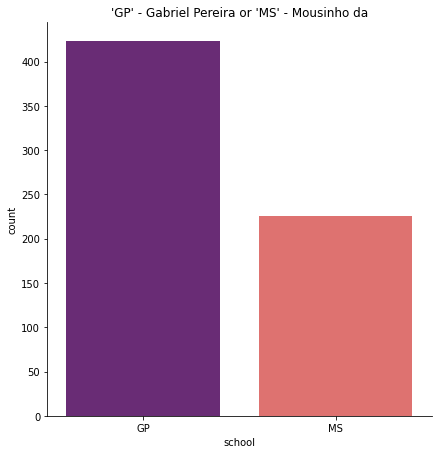

In [ ]:
# visualize number of students in each school
sns.catplot(x="school", kind="count",palette="magma", data=cr7, height = 6)
plt.title("'GP' - Gabriel Pereira or 'MS' - Mousinho da")


Text(0.5, 0, 'Alcohol consumption rate')

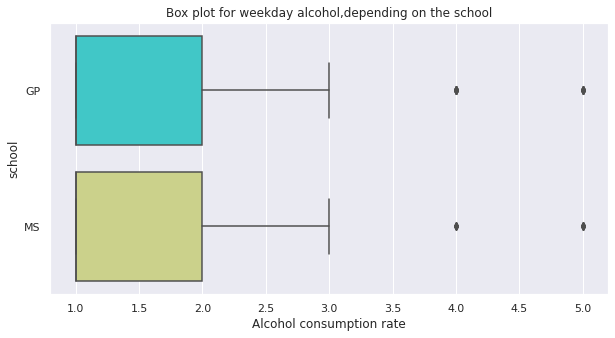

In [ ]:
#plot graphs for both weekday and weekend drinking depending on school the students attend 
plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,depending on the school")
sns.boxplot(y="school", x="dalc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

Text(0.5, 0, 'Alcohol consumption rate')

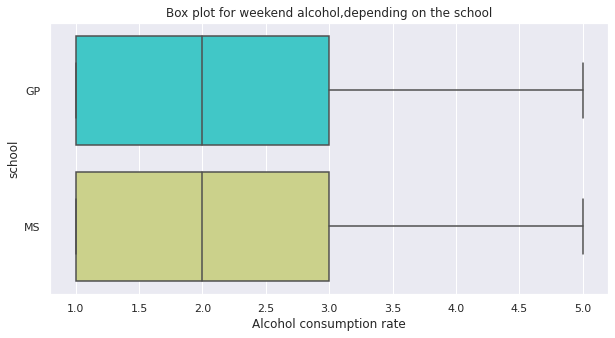

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,depending on the school")
sns.boxplot(y="school", x="walc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

###*GENDER vs ALCOHOL CONSUMPTION*

In [ ]:
#How do the students' genders affect alcohol consumption rates
#Get overall description of the data in the sex column
#
cr7.sex.describe().T

count     649
unique      2
top         F
freq      383
Name: sex, dtype: object

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

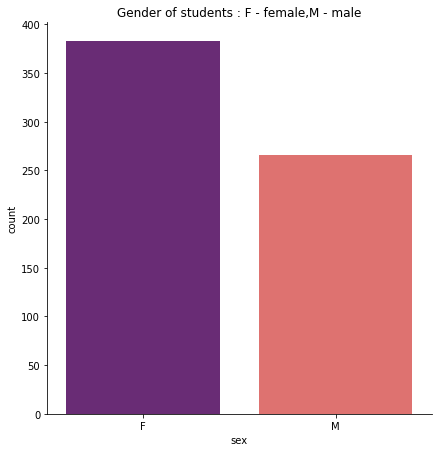

In [ ]:
#visualize the number of girls vs boys in the schools 
sns.catplot(x="sex", kind="count",palette="magma", data=cr7, height = 6)
plt.title("Gender of students : F - female,M - male")
#The number of girls is a little more

Text(0.5, 0, 'Alcohol consumption rate')

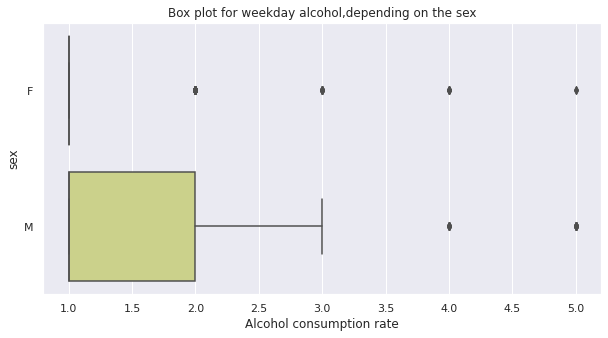

In [ ]:
#plot graphs for both weekday and weekend drinking depending on sex of the students
plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,depending on the sex")
sns.boxplot(y="sex", x="dalc", data = cr7 , orient="h", palette = 'rainbow')
#males seem to do the more weekday drinking
plt.xlabel("Alcohol consumption rate")

Text(0.5, 0, 'Alcohol consumption rate')

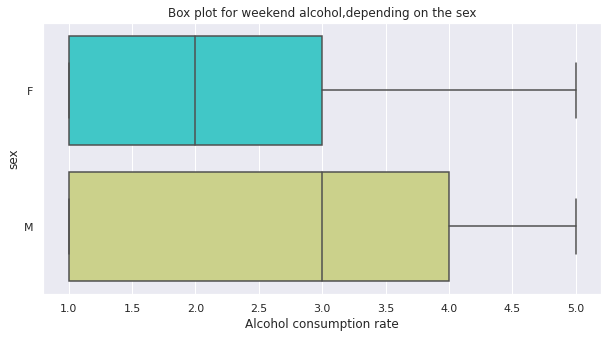

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,depending on the sex")
sns.boxplot(y="sex", x="walc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")
#more females drink over the weekend than during the week but still relatively more males do it 

###*AGE vs ALCOHOL CONSUMPTION*

In [ ]:
##How do student ages affect alcohol consumption rates
#Get overall description of the data in the age column
#
cr7.age.describe().T

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age of students : 17 16 18 15 19 20 21 22 ')

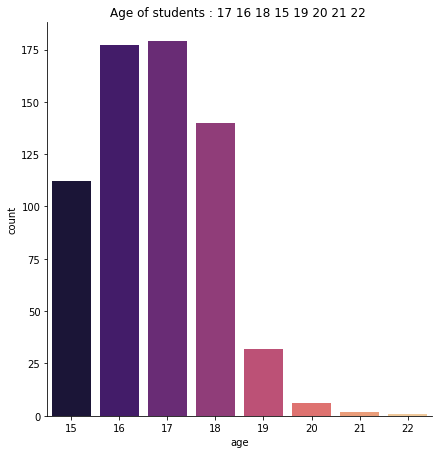

In [ ]:
#plot graphs of the ages of students in the school
sns.catplot(x="age", kind="count",palette="magma", data=cr7, height = 6)
plt.title("Age of students : 17 16 18 15 19 20 21 22 " )
#basically we are dealing with students 17-19 years

Text(0.5, 0, 'Alcohol consumption rate')

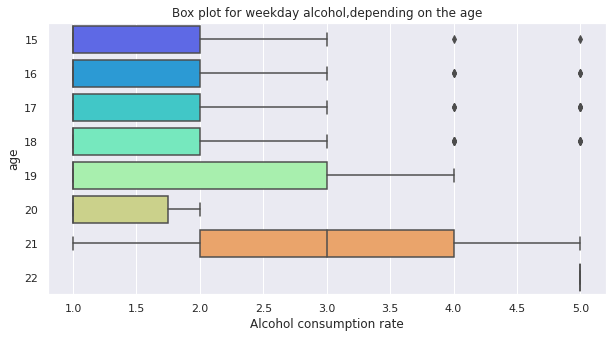

In [ ]:
#plot graphs for both weekday and weekend drinking depending on age of the students
plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,depending on the age")
sns.boxplot(y="age", x="dalc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")
#older students, 19 - 21, seem to drink more over the week 

Text(0.5, 0, 'Alcohol consumption rate')

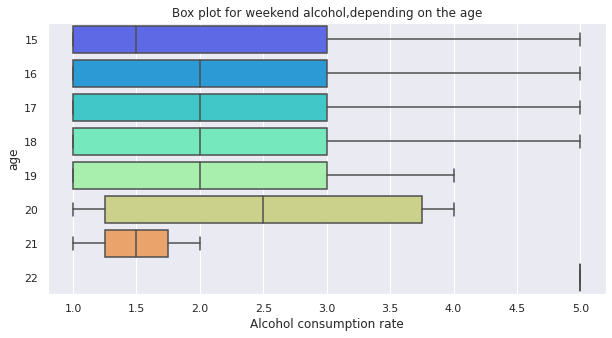

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,depending on the age")
sns.boxplot(y="age", x="walc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")
#there's more younger people drinking over the weekend and much fewer 21 year olds  

###*ADDRESS vs ALCOHOL CONSUMPTION*

In [ ]:
# Does the student's home address affect alcohol consumption rates
# Get overall description of the data in the address column
#
cr7.address.describe().T

count     649
unique      2
top         U
freq      452
Name: address, dtype: object

Text(0.5, 1.0, 'Address of students : U - Urban,R - Rural')

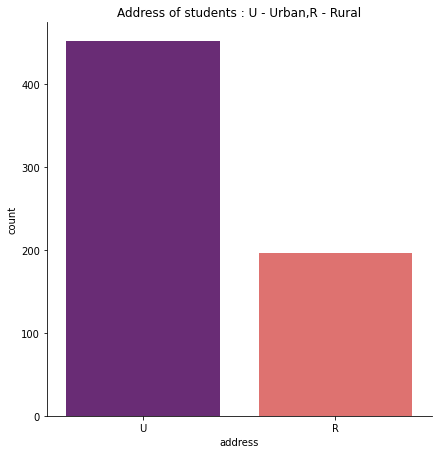

In [ ]:
#plot graphs of the addresses of students in the school
sns.catplot(x="address", kind="count",palette="magma", data=cr7, height = 6)
plt.title("Address of students : U - Urban,R - Rural" )
#Most students are from urban areas

Text(0.5, 0, 'Alcohol consumption rate')

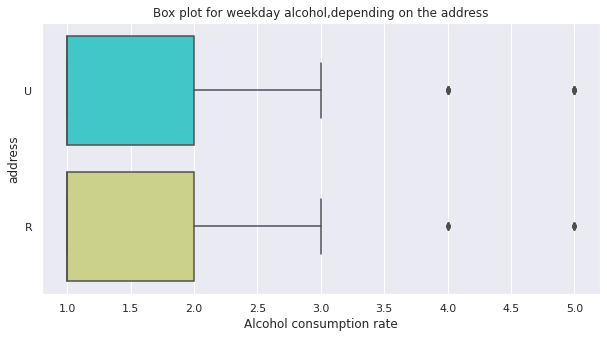

In [ ]:
#plot graphs for both weekday and weekend drinking depending on address where the students live
plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,depending on the address")
sns.boxplot(y="address", x="dalc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")
#There's a similar average drinking for both urban and rural dwellers during the week

Text(0.5, 0, 'Alcohol consumption rate')

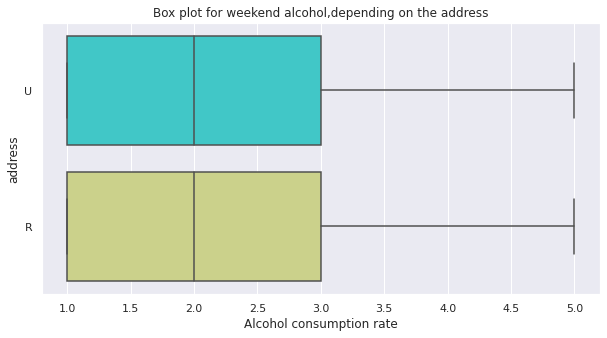

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,depending on the address")
sns.boxplot(y="address", x="walc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")
#There's a similar average drinking for both urban and rural dwellers during the weekend, but both higher
#than over the week

###*TRAVEL TIME vs ALCOHOL CONSUMPTION*

Text(12.294444444444451, 0.5, 'Students')

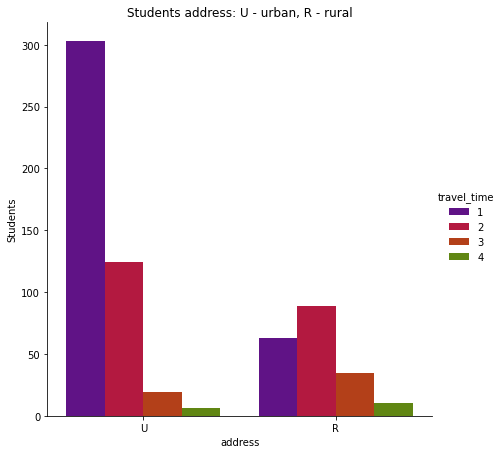

In [ ]:
#How does the time it takes to get to school affect alcohol consumption rates 
#Plot figures for time it takes to get to school, as travel time, based on student address (urban vs rural)
# Also display the time that students spend on the way to school ( 1 - very close, 4 - very far).
#
sns.catplot(x="address", kind="count",hue = "travel_time",palette="brg", data=cr7, height = 6)
plt.title("Students address: U - urban, R - rural")
plt.ylabel("Students")

# Most of the students live in the city. Takes them shorter time to get to school 
# students living in the rural areas probably take more time eto get to school because of transport issues

Text(0.5, 0, 'Alcohol consumption rate')

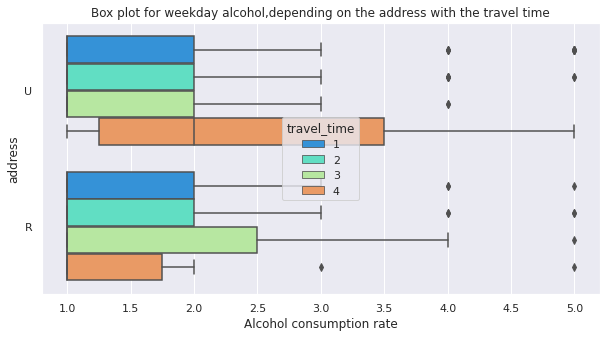

In [ ]:
#plot graphs for both weekday and weekend drinking depending on address where the students live(U vs R) and the time it takes
#to get to school (travel time)
#
plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,depending on the address with the travel time")
sns.boxplot(y="address", x="dalc",hue='travel_time' , data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")


Text(0.5, 0, 'Alcohol consumption rate')

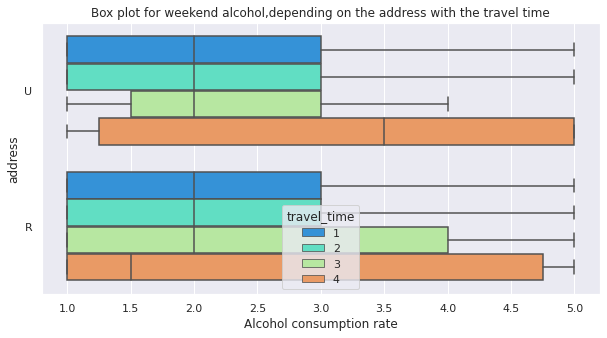

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,depending on the address with the travel time")
sns.boxplot(y="address", x="walc",hue='travel_time' , data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

###*STUDY TIME vs ALCOHOL CONSUMPTION*

Text(0.5, 1.0, 'Relationship between study time and alcohol consumption')

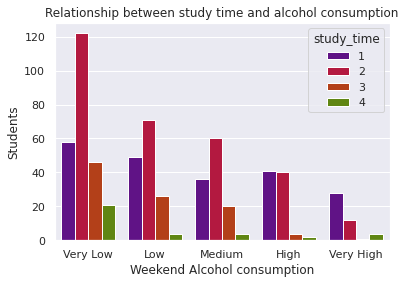

In [ ]:
#How does the time students take to study affect alcohol consumption rates
#Plot figures for the students' study time in hours vs weekend alcohol consumption
# 
#sns.countplot(data= cr7, x= 'walc', hue= "study_time")
ax = sns.countplot(x="walc", hue="study_time",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekend Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between study time and alcohol consumption")

Text(0.5, 1.0, 'Relationship between study time and alcohol consumption')

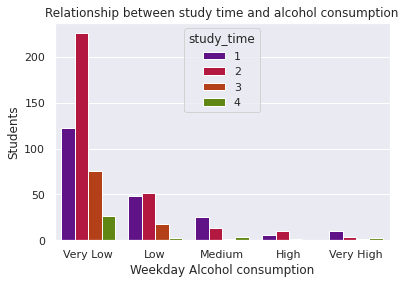

In [ ]:
# Plot figures for the students' study time vs weekday alcohol consumption
# 
#sns.countplot(data= cr7, x= 'dalc', hue= "study_time")
ax = sns.countplot(x="dalc", hue="study_time",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekday Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between study time and alcohol consumption")

###*HEAVY DRINKERS vs BINGE DRINKERS*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


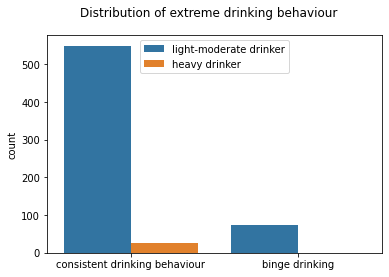

In [ ]:
#plot the graph of heavy vs binge drinkers as determined by the number of weekday and weekend hours 
#spent drinking 
#

cr7.loc[(cr7["walc"].isin([4,5]) & cr7["dalc"].isin([1,2])), "binge_drinker"] = 1
cr7.loc[(cr7["walc"].isin([4,5]) & cr7["dalc"].isin([4,5])), "heavy_drinker"] = 1
cr7[["binge_drinker", "heavy_drinker"]] = cr7[["binge_drinker", "heavy_drinker"]].fillna(0)
fig, ax = plt.subplots()
sns.countplot("binge_drinker", hue="heavy_drinker", data=cr7, ax=ax)

l = ax.legend()
l.set_title("")
new_legend_labels = ['light-moderate drinker', 'heavy drinker']
for t, l in zip(l.texts, new_legend_labels): t.set_text(l)

ax.set_xlabel("")
ax.set_xticklabels(['consistent drinking behaviour', 'binge drinking'])
fig.suptitle("Distribution of extreme drinking behaviour");
#this shows we have more light drinkers than binge drinkers

###*PARENTAL STATUS vs ALCOHOL CONSUMPTION*

In [ ]:
#Does a student's parental status, together or apart, affect alcohol consumption rates 
#Get number of students whose parents are apart
#
s = cr7[cr7["p_status"] == 'A']
s["p_status"].shape


(80,)

In [ ]:
# Get number of students whose parents are together
y = cr7[cr7["p_status"] == "T"]
y["p_status"].shape

(569,)

In [ ]:
# count of weekday alcohol consumption of students according to parental status
x = cr7.groupby(["p_status", "dalc"])
y = x["p_status"].count()
y

p_status  dalc
A         1        62
          2         9
          3         6
          4         1
          5         2
T         1       389
          2       112
          3        37
          4        16
          5        15
Name: p_status, dtype: int64

In [ ]:
# count of weekend alcohol consumption of students according to parental status
x = cr7.groupby(["p_status", "walc"])
y = x["p_status"].count()
y

p_status  walc
A         1        39
          2        17
          3         9
          4        12
          5         3
T         1       208
          2       133
          3       111
          4        75
          5        42
Name: p_status, dtype: int64

Text(0.5, 1.0, 'Relationship between parental status and alcohol consumption')

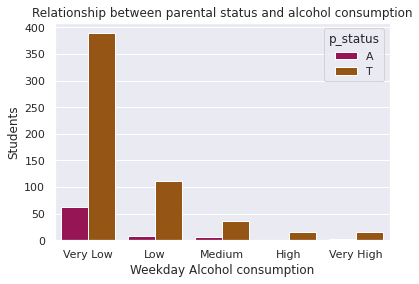

In [ ]:
# plot bar graph of count of students weekday alcohol consumption according to parental status
#sns.countplot(data= cr7, x= 'dalc', hue= "p_status")
ax = sns.countplot(x="dalc", hue="p_status",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekday Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between parental status and alcohol consumption")

Text(0.5, 1.0, 'Relationship between parental status and alcohol consumption')

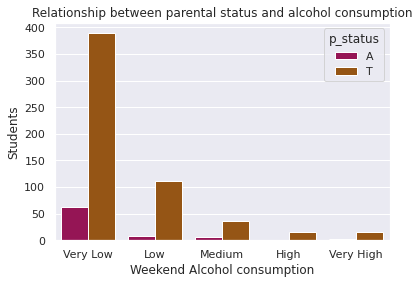

In [ ]:
# plot bar graph of count of students weekend alcohol consumption according to parental status
#sns.countplot(data= cr7, x= 'walc', hue= "p_status")
ax = sns.countplot(x="dalc", hue="p_status",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekend Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between parental status and alcohol consumption")

###*AVERAGE GRADE vs PARENTAL STATUS*

In [ ]:
# What are the average grades of students in families that are together vs apart  
# average grade of students whose parents are together and apart.
#
ensemble = cr7[cr7["p_status"] == "T"]
together = ensemble["grade"].mean()
print(together)
apartheid = cr7[cr7["p_status"] == "A"]
apart = apartheid["grade"].mean()
print(apart)

11.636836555360285
11.541749999999997


Text(0.5, 1.0, 'Impact of parental status on performance')

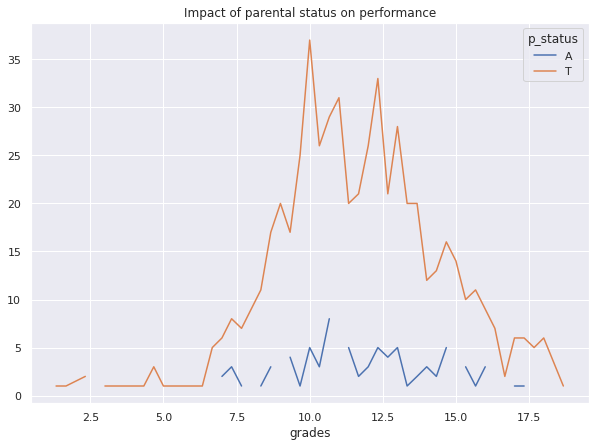

In [ ]:
# line graph of count of students grades according to parental status
fig, ax = plt.subplots(figsize= (10, 7))
cr7.groupby(["grade", "p_status"]).count()["sex"].unstack().plot(ax = ax)
#parents who had "together" status had children with higher grades on average 
plt.xlabel("grades")
#plt.ylabel("Students")
plt.title("Impact of parental status on performance")




###*AVERAGE GRADE vs FAMILY SIZE*

In [ ]:
# Is there a corelation between average grade and family size 
# first find average score of students with a family size greater than 3 and less than 3
great = cr7[cr7["fam_size"] == "GT3"]
greater = great["grade"].mean()
print(greater)
lesser = cr7[cr7["fam_size"] == "LE3"]
less = lesser["grade"].mean()
print(less)

11.541115973741794
11.82505208333334


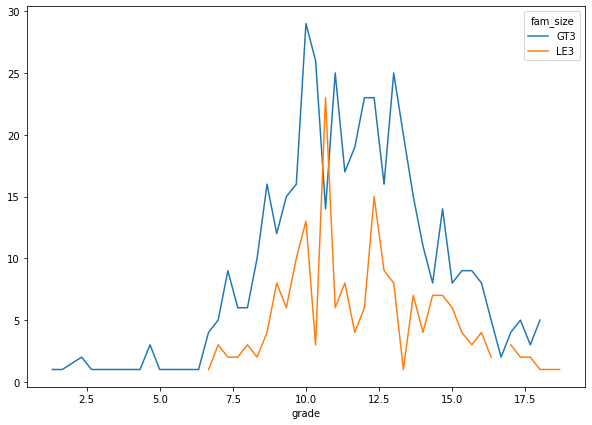

In [ ]:
# plot line graph of count of students grades according to family size
fig, ax = plt.subplots(figsize= (10, 7))
cr7.groupby(["grade", "fam_size"]).count()["sex"].unstack().plot(ax = ax)

###*FAMILY SIZE vs ALCOHOL CONSUMPTION*

In [ ]:
#Does family size affect alcohol consumption 
# first find number of students who have a family size greater than 3
#
s = cr7[cr7["fam_size"] == 'GT3']
s["fam_size"].shape

(457,)

In [ ]:
# number of students who have a family less than 3
e = cr7[cr7["fam_size"] == "LE3"]
e["fam_size"].shape

(192,)

In [ ]:
# count of weekday alcohol consumption of students according to family size
x = cr7.groupby(["fam_size", "dalc"])
y = x["fam_size"].count()
y

fam_size  dalc
GT3       1       328
          2        80
          3        26
          4        11
          5        12
LE3       1       123
          2        41
          3        17
          4         6
          5         5
Name: fam_size, dtype: int64

Text(0.5, 1.0, 'Relationship between family size and alcohol consumption')

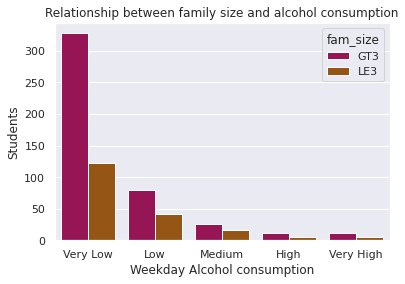

In [ ]:
# bar graph of count of students weekday alcohol consumption according to family size
#sns.countplot(data= cr7, x= 'dalc', hue= "fam_size")
ax = sns.countplot(x="dalc", hue="fam_size",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekday Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between family size and alcohol consumption")

In [ ]:
# count of weekend alcohol consumption of students according to family size
x = cr7.groupby(["fam_size", "walc"])
y = x["fam_size"].count()
y

fam_size  walc
GT3       1       184
          2       104
          3        84
          4        58
          5        27
LE3       1        63
          2        46
          3        36
          4        29
          5        18
Name: fam_size, dtype: int64

Text(0.5, 1.0, 'Relationship between family size and alcohol consumption')

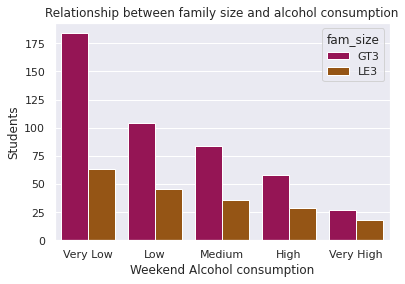

In [ ]:
# bar graph of count of students weekend alcohol consumption according to family size
#sns.countplot(data= cr7, x= 'walc', hue= "fam_size")
ax = sns.countplot(x="walc", hue="fam_size",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekend Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between family size and alcohol consumption")

Text(0.5, 1.0, 'Relationship between family size and going out')

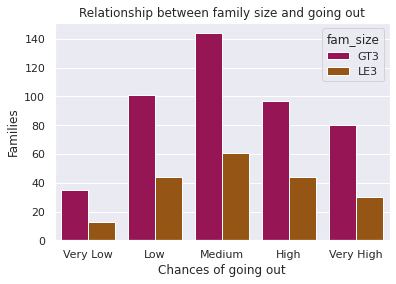

In [ ]:
# bar graph assessing family size with chances of going out
#sns.countplot(data= cr7, x= 'walc', hue= "fam_size")
ax = sns.countplot(x="go_out", hue="fam_size",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Chances of going out")
plt.ylabel("Families")
plt.title("Relationship between family size and going out")

###*REASON FOR GOING TO SCHOOL vs ALCOHOL CONSUMPTION*

In [ ]:
#Do the student's reasons for going to school affect their alcohol consumption   
#find the count of individual reasons for students going to the school
#
q = cr7.groupby("reason")
d = q["reason"].count()
d

reason
course        285
home          149
other          72
reputation    143
Name: reason, dtype: int64

In [ ]:
# count of students weekday alcohol consumption according to reason
m = cr7.groupby(["reason", "dalc"])
n = m["reason"].count()
n

reason      dalc
course      1       203
            2        55
            3        14
            4         7
            5         6
home        1        97
            2        30
            3        12
            4         4
            5         6
other       1        39
            2        17
            3         9
            4         4
            5         3
reputation  1       112
            2        19
            3         8
            4         2
            5         2
Name: reason, dtype: int64

In [ ]:
# count of students weekend alcohol consumption according to reason
x = cr7.groupby(["reason", "walc"])
y = x["reason"].count()
y

reason      walc
course      1       115
            2        66
            3        45
            4        40
            5        19
home        1        56
            2        33
            3        28
            4        20
            5        12
other       1        23
            2        16
            3        14
            4        12
            5         7
reputation  1        53
            2        35
            3        33
            4        15
            5         7
Name: reason, dtype: int64

Text(0.5, 1.0, 'Relationship between choice of school and alcohol consumption')

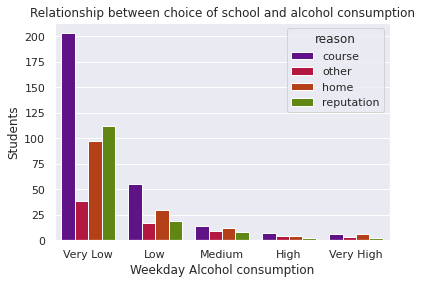

In [ ]:
# bar graph of count of students weekday alcohol consumption according to reason
#sns.countplot(data= cr7, x= 'dalc', hue= "reason")
ax = sns.countplot(x="dalc", hue="reason",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekday Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between choice of school and alcohol consumption")

Text(0.5, 1.0, 'Relationship between choice of school and alcohol consumption')

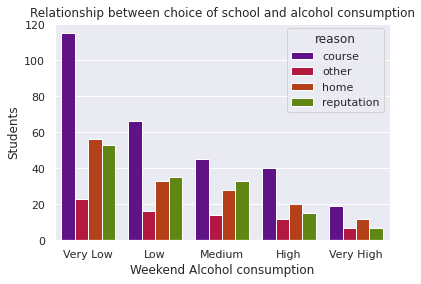

In [ ]:
# bar graph of count of students weekend alcohol consumption according to reason
#sns.countplot(data= cr7, x= 'walc', hue= "reason")
ax = sns.countplot(x="walc", hue="reason",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekend Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between choice of school and alcohol consumption")

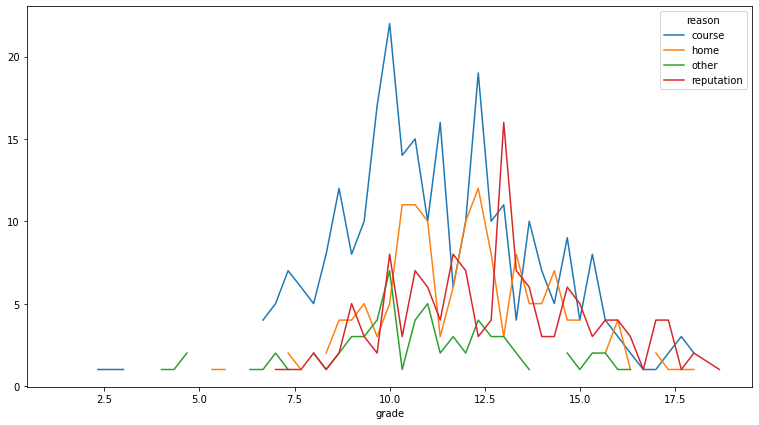

In [ ]:
# line graph of count of students grades according to reason
fig, ax = plt.subplots(figsize= (13, 7))
cr7.groupby(["grade", "reason"]).count()["sex"].unstack().plot(ax = ax)

###*GUARDIANS vs ALCOHOL CONSUMPTION*

In [ ]:
#How does having guardians, and specifically each gender of guardian, affect alcohol consumption among students
# find the count of students' guardians
q = cr7.groupby("guardian")
d = q["guardian"].count()
d

guardian
father    153
mother    455
other      41
Name: guardian, dtype: int64

In [ ]:
# count of student guardian's in each school
q = cr7.groupby(["school", "guardian"])
d = q["guardian"].count()
d

school  guardian
GP      father       91
        mother      304
        other        28
MS      father       62
        mother      151
        other        13
Name: guardian, dtype: int64

In [ ]:
# count of student weekday alcohol consumption according to guardian
q = cr7.groupby(["guardian", "dalc"])
d = q["guardian"].count()
d

guardian  dalc
father    1        98
          2        35
          3        12
          4         5
          5         3
mother    1       331
          2        77
          3        27
          4         8
          5        12
other     1        22
          2         9
          3         4
          4         4
          5         2
Name: guardian, dtype: int64

In [ ]:
# count of student weekend alcohol consumption according to guardian
b = cr7.groupby(["guardian", "walc"])
a = b["guardian"].count()
a 

guardian  walc
father    1        57
          2        37
          3        27
          4        20
          5        12
mother    1       174
          2       106
          3        83
          4        60
          5        32
other     1        16
          2         7
          3        10
          4         7
          5         1
Name: guardian, dtype: int64

In [ ]:
# average students grades according to grade
mere = cr7[cr7["guardian"] == "mother"]
maman = mere["grade"].mean()
print(maman)
pere = cr7[cr7["guardian"] == "father"]
papa = pere["grade"].mean()
print(papa)
autres = cr7[cr7["guardian"] == "other"]
autre = autres["grade"].mean()
print(autre)

11.619846153846156
11.954248366013077
10.455365853658538


Text(0.5, 1.0, 'Relationship between guardian type and alcohol consumption')

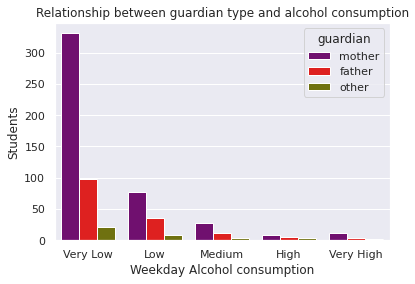

In [ ]:
# bar graph of student weekday alcohol consumption according to guardian 
#sns.countplot(data= cr7, x= 'dalc', hue= "guardian")
ax = sns.countplot(x="dalc", hue="guardian",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekday Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between guardian type and alcohol consumption")

Text(0.5, 1.0, 'Relationship between guardian type and alcohol consumption')

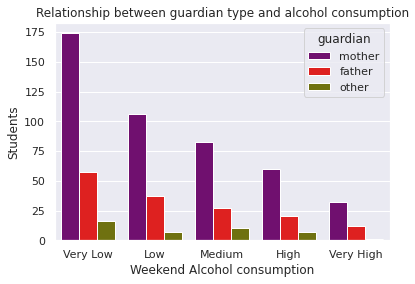

In [ ]:
# bar graph of student weekend alcohol consumption according to guardian
#sns.countplot(data= cr7, x= 'walc', hue= "guardian")
ax = sns.countplot(x="walc", hue="guardian",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Weekend Alcohol consumption")
plt.ylabel("Students")
plt.title("Relationship between guardian type and alcohol consumption")

Text(0.5, 1.0, 'Guardianship and alcohol consumption')

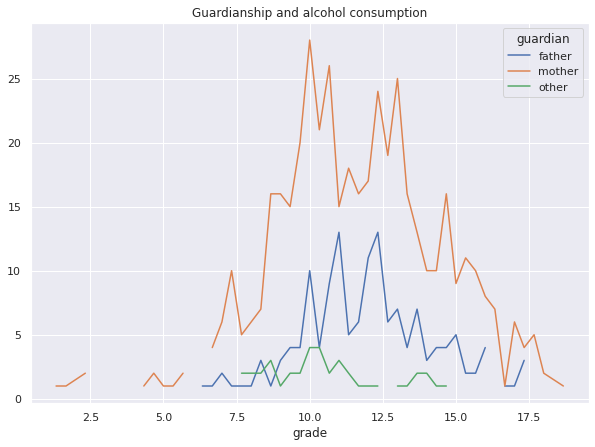

In [ ]:
# line graph of count of students grades according to guardian
fig, ax = plt.subplots(figsize= (10, 7))
cr7.groupby(["grade", "guardian"]).count()["sex"].unstack().plot(ax = ax)
plt.title("Guardianship and alcohol consumption")

###*FAILURES AND ABSENCES DATA vs ALCOHOL CONSUMPTION*

In [ ]:
#importing our already cleaned data set
df = pd.read_csv('cr7.csv', encoding='Latin1')
df.head(5)

,Unnamed: 0,school,sex,age,address,fam_size,p_status,m_edu,f_edu,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,higher,internet,romantic,fam_rel,free_time,go_out,dalc,walc,health,absences,objecting,grade
0,0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,7.33
1,1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,1,10.33
2,2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,2,12.33
3,3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,3,14.00
4,4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,4,12.33


In [ ]:
#Column explanation / definition
# failures: number of past class failures (numeric: n if 1<=n<3, else 4)
# absences:	number (of days) of school absences (numeric: from 0 to 93)
print(df['failures'].nlargest(5))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df['absences'].nlargest(5))

18     3
78     3
131    3
169    3
170    3
Name: failures, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
197    32
212    30
256    26
150    24
155    22
Name: absences, dtype: int64


####*i. Failures vs Age of alcohol consumers*

failures  age
0         15     108
          16     161
          17     153
          18     112
          19      13
          20       2
1         15       4
          16      12
          17      19
          18      19
          19      13
          20       3
2         16       3
          17       1
          18       6
          19       3
          20       1
          21       2
3         16       1
          17       6
          18       3
          19       3
          22       1
Name: age, dtype: int64
*****************************************************


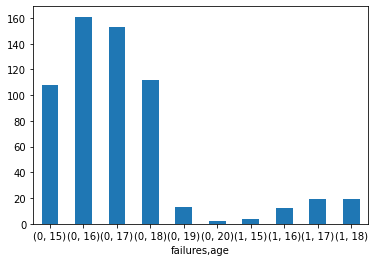

In [ ]:
#Investigation the relationship between past failures and ages that consume alcohol
print(df.groupby(['failures', 'age' ])['age'].count())
print('*****************************************************')
df.groupby(['failures', 'age' ])['age'].count().head(10).plot.bar(x='age', y='failures', rot=0)

####*ii. Failures vs Sex of alcohol consumers*

failures  sex
0         F      329
          M      220
1         F       42
          M       28
2         F        7
          M        9
3         F        5
          M        9
Name: sex, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


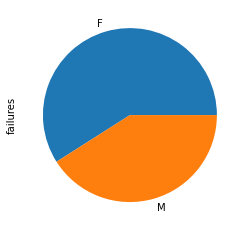

In [ ]:
#Investigation the relationship between past failures against the sexes that consume alcohol
print(df.groupby(['failures', 'sex' ])['sex'].count())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
df.groupby(['sex' ])['failures'].count().plot.pie()

##Failure vs Alcohol Consumption

Text(0.5, 0, 'Alcohol consumption rate')

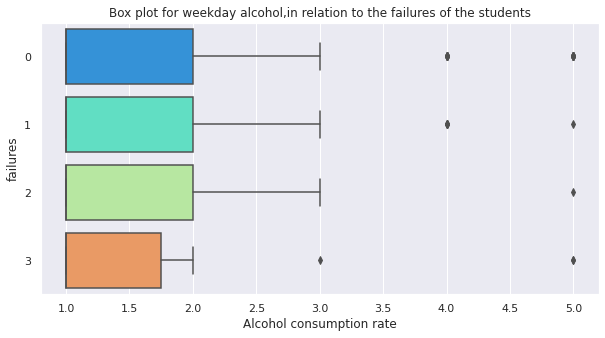

In [ ]:
#plot graphs for both weekday and weekend drinking in relation to the failures of the students

plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,in relation to the failures of the students")
sns.boxplot(y="failures", x="dalc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

Text(0.5, 0, 'Alcohol consumption rate')

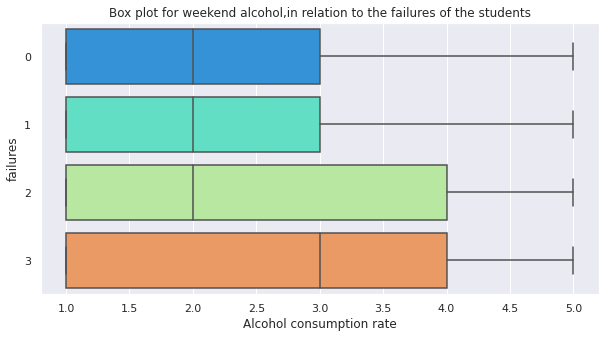

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,in relation to the failures of the students")
sns.boxplot(y="failures", x="walc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

#### *iii. School absence vs Age of alcohol consumers*

age
17    179
16    177
18    140
15    112
19     32
Name: absences, dtype: int64
*******************************************************


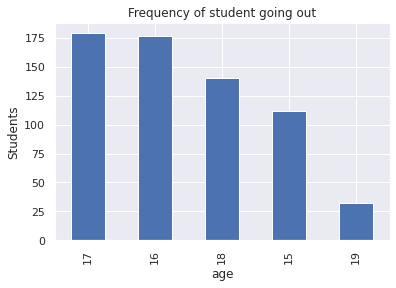

In [ ]:
#Investigating the relationship between school-day-absences againist ages that consume alcohol
print(df.groupby(['age',])['absences'].count().nlargest())
print("*******************************************************")
df.groupby(['age',])['absences'].count().nlargest(5).plot.bar()
plt.xlabel("age")
plt.ylabel("Students")
plt.title("Frequency of student going out")
palette="brg"

####*iv. School absence vs Sex of alcohol consumers*

sex
F    383
M    266
Name: absences, dtype: int64


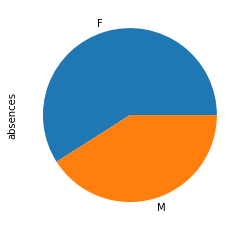

In [ ]:
#Investigating the relationship between school-day-absences against sex that consume alcohol
print(df.groupby(['sex',])['absences'].count().nlargest())
df.groupby(['sex',])['absences'].count().nlargest().plot.pie()

##SCHOOL ABSENCE VS ALCOHOL CONSUMPTION

Text(0.5, 0, 'Alcohol consumption rate')

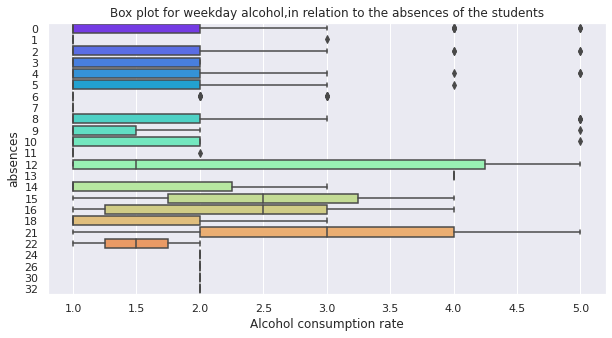

In [ ]:
#plot graphs for weekday drinking in relation to the absences of the students

plt.figure(figsize=(10,5))
plt.title("Box plot for weekday alcohol,in relation to the absences of the students")
sns.boxplot(y="absences", x="dalc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

Text(0.5, 0, 'Alcohol consumption rate')

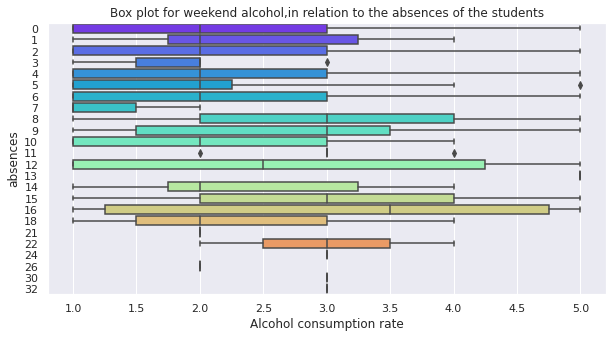

In [ ]:
#plot graphs for weekend drinking in relation to the absences of the students

plt.figure(figsize=(10,5))
plt.title("Box plot for weekend alcohol,in relation to the absences of the students")
sns.boxplot(y="absences", x="walc", data = cr7 , orient="h", palette = 'rainbow')
plt.xlabel("Alcohol consumption rate")

###*SCHOOL SUPPORT vs ALCOHOL CONSUMPTION*

walc  school_sup
1     no            207
      yes            40
2     no            144
      yes             6
3     no            107
      yes            13
4     no             81
      yes             6
5     no             42
      yes             3
Name: school_sup, dtype: int64

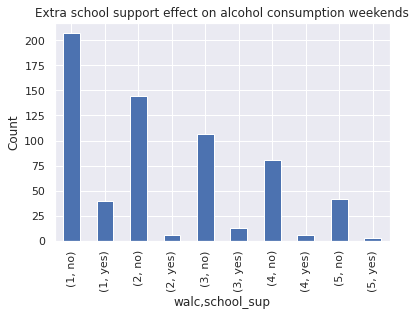

In [ ]:
# how extra educational support affects alcoholism on weekends
# plot graph of school support agains weekend drinking
#
cr7_df = cr7[['school_sup', 'fam_sup', 'paid','higher', 'activities', 'internet', 'romantic', 'dalc', 'walc']]
cr7_df
school_1 = cr7_df.groupby(['walc', 'school_sup'])['school_sup'].count()
school_1.plot.bar()
plt.title('Extra school support effect on alcohol consumption weekends')
plt.ylabel('Count', fontsize=12)
school_1


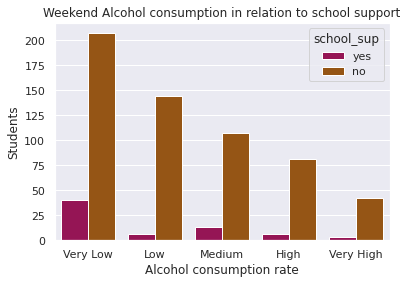

In [ ]:
#Alcohol consumption during the weekend in relation to school support
ax = sns.countplot(x="walc", hue="school_sup",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to school support");

dalc  school_sup
1     no            400
      yes            51
2     no            110
      yes            11
3     no             41
      yes             2
4     no             15
      yes             2
5     no             15
      yes             2
Name: school_sup, dtype: int64

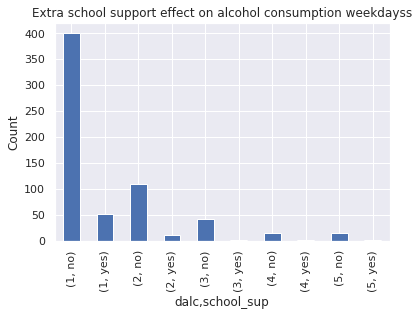

In [ ]:
# how extra educational support affects alcoholism on weekdays
#plot graph of school support agains weekday drinking
#
school_2 = cr7_df.groupby(['dalc', 'school_sup'])['school_sup'].count()
school_2.plot.bar()
plt.title('Extra school support effect on alcohol consumption weekdayss')
plt.ylabel('Count', fontsize=12)
school_2


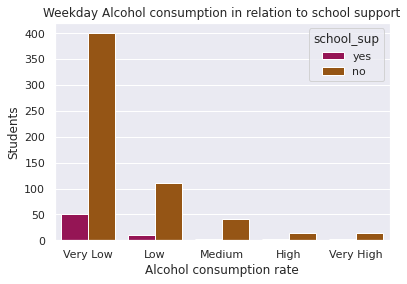

In [ ]:
#Alcohol consumption during the weekday in relation to school support
ax = sns.countplot(x="dalc", hue="school_sup",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to school support");

###*FAMILY SUPPORT vs ALCOHOL CONSUMPTION*

walc  fam_sup
1     no          93
      yes        154
2     no          52
      yes         98
3     no          42
      yes         78
4     no          44
      yes         43
5     no          20
      yes         25
Name: fam_sup, dtype: int64

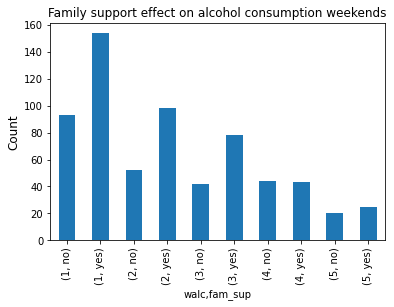

In [ ]:
# how familial support affects alcohol consumption on weekends
# plot graph of family support against weekend drinking
#
fam_1 = cr7_df.groupby(['walc', 'fam_sup'])['fam_sup'].count()
fam_1.plot.bar()
plt.title('Family support effect on alcohol consumption weekends')
plt.ylabel('Count', fontsize=12)
fam_1

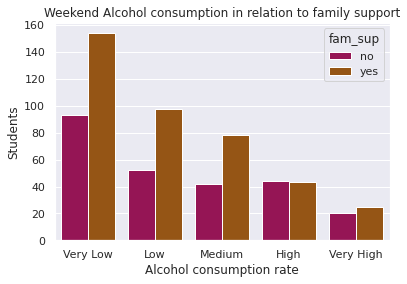

In [ ]:
#Alcohol consumption during the weekend in relation to family support
ax = sns.countplot(x="walc", hue="fam_sup",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to family support");

dalc  fam_sup
1     no         171
      yes        280
2     no          44
      yes         77
3     no          24
      yes         19
4     no           9
      yes          8
5     no           3
      yes         14
Name: fam_sup, dtype: int64

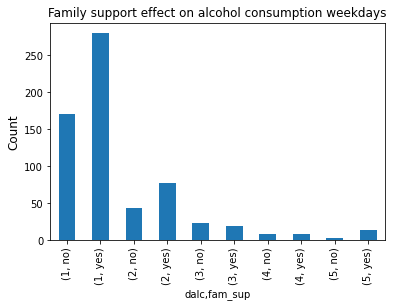

In [ ]:
# how familial support affects alcohol consumption on weekdays
# plot graph of family support against weekday drinking
#
fam_2 = cr7_df.groupby(['dalc', 'fam_sup'])['fam_sup'].count()
fam_2.plot.bar()
plt.title('Family support effect on alcohol consumption weekdays')
plt.ylabel('Count', fontsize=12)
fam_2


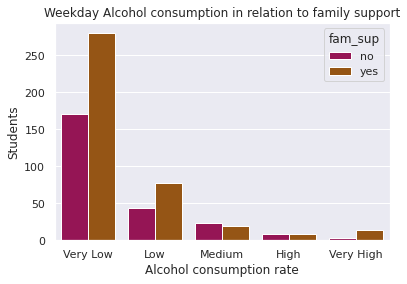

In [ ]:
#Alcohol consumption during the weekday in relation to school support
ax = sns.countplot(x="dalc", hue="fam_sup",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to family support");

###*EXTRA PAID CLASSES VS ALCOHOL CONSUMPTION*

walc  paid
1     no      233
      yes      14
2     no      142
      yes       8
3     no      115
      yes       5
4     no       78
      yes       9
5     no       42
      yes       3
Name: paid, dtype: int64

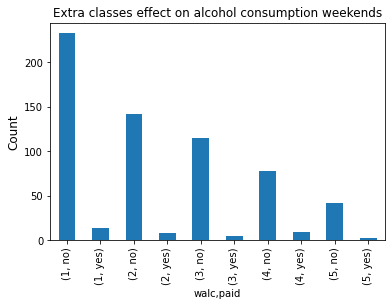

In [ ]:
# how extra income affects alcoholism on weekends
# plot graph of 'paid' status against weekend drinking
#
paid_1 = cr7_df.groupby(['walc', 'paid'])['paid'].count()
paid_1.plot.bar()
plt.title('Extra classes effect on alcohol consumption weekends')
plt.ylabel('Count', fontsize=12)
paid_1

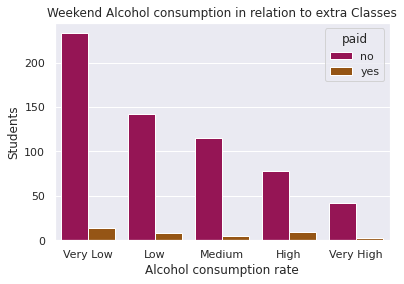

In [ ]:
#Alcohol consumption during the weekend in relation to family support
ax = sns.countplot(x="walc", hue="paid",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to extra Classes");

dalc  paid
1     no      428
      yes      23
2     no      111
      yes      10
3     no       40
      yes       3
4     no       16
      yes       1
5     no       15
      yes       2
Name: paid, dtype: int64

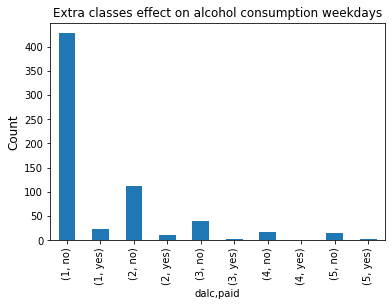

In [ ]:
# how extra income affects alcohol consumption on weekdays
# plot graph of 'paid' status against weekday drinking
#
paid_2 = cr7_df.groupby(['dalc', 'paid'])['paid'].count()
paid_2.plot.bar()
plt.title('Extra classes effect on alcohol consumption weekdays')
plt.ylabel('Count', fontsize=12)
paid_2

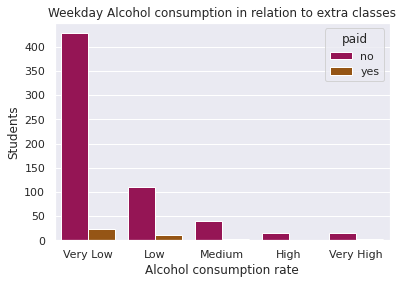

In [ ]:
#Alcohol consumption during the weekday in relation to extra income
ax = sns.countplot(x="dalc", hue="paid",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to extra classes");

### *ACTIVITIES vs ALCOHOL CONSUMPTION*

walc  activities
1     no            122
      yes           125
2     no             88
      yes            62
3     no             63
      yes            57
4     no             44
      yes            43
5     no             17
      yes            28
Name: activities, dtype: int64

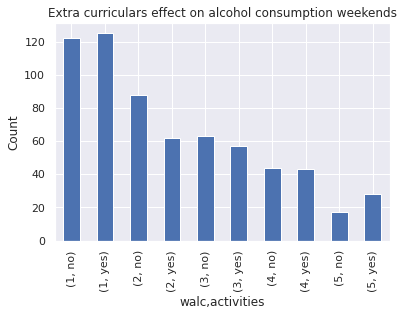

In [ ]:
# how having extra curriculars affects alcoholism on weekends
# plot graph of activities against weekend drinking
#
act_1 = cr7_df.groupby(['walc', 'activities'])['activities'].count()
act_1.plot.bar()
plt.title('Extra curriculars effect on alcohol consumption weekends')
plt.ylabel('Count', fontsize=12)
act_1


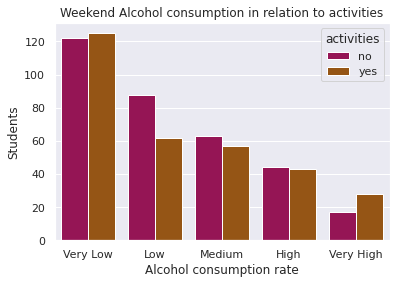

In [ ]:
#Alcohol consumption during the weekend in relation to extra activities
ax = sns.countplot(x="walc", hue="activities",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to activities");

dalc  activities
1     no            230
      yes           221
2     no             66
      yes            55
3     no             24
      yes            19
4     no              9
      yes             8
5     no              5
      yes            12
Name: activities, dtype: int64

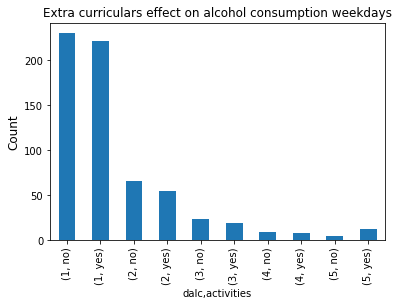

In [ ]:
# how having extra curriculars affects alcoholism on weekdays
# plot graph of activities against weekday drinking
#
act_2 = cr7_df.groupby(['dalc', 'activities'])['activities'].count()
act_2.plot.bar()
plt.title('Extra curriculars effect on alcohol consumption weekdays')
plt.ylabel('Count', fontsize=12)
act_2

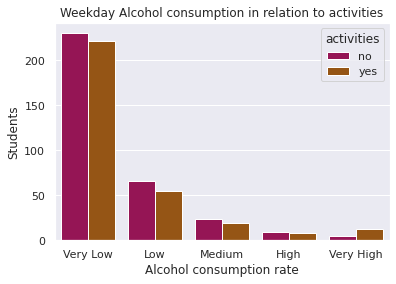

In [ ]:
#Alcohol consumption during the weekday in relation to extra activities
ax = sns.countplot(x="dalc", hue="activities",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to activities");

###*INTERNET ACCESS vs ALCOHOL CONSUMPTION*

walc  internet
1     no           67
      yes         180
2     no           34
      yes         116
3     no           23
      yes          97
4     no           16
      yes          71
5     no           11
      yes          34
Name: internet, dtype: int64

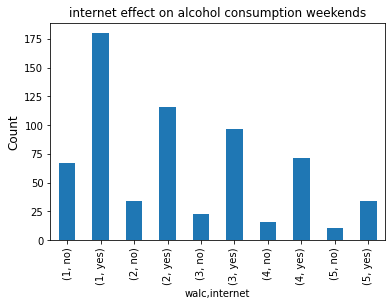

In [ ]:
# effect of having internet access at home on alcohol consumption
# over weekends
#plot graph of internet vs weekend alcohol consumption
#
int_1 = cr7_df.groupby(['walc', 'internet'])['internet'].count()
int_1.plot.bar()
plt.title('internet effect on alcohol consumption weekends')
plt.ylabel('Count', fontsize=12)
int_1

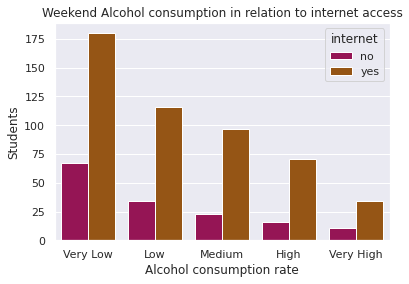

In [ ]:
#Alcohol consumption during the weekend in relation to internet access
ax = sns.countplot(x="walc", hue="internet",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to internet access");

dalc  internet
1     no          109
      yes         342
2     no           26
      yes          95
3     no           11
      yes          32
4     no            3
      yes          14
5     no            2
      yes          15
Name: internet, dtype: int64

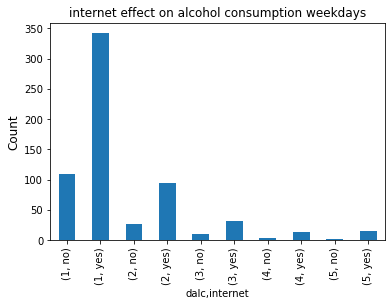

In [ ]:
# effect of having internet access at home on alcohol consumption
# over weekdays
#plot graph of internet vs weekday alcohol consumption
#
int_2 = cr7_df.groupby(['dalc', 'internet'])['internet'].count()
int_2.plot.bar()
plt.title('internet effect on alcohol consumption weekdays')
plt.ylabel('Count', fontsize=12)
int_2

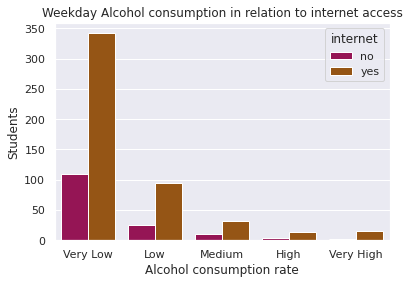

In [ ]:
#Alcohol consumption during the weekday in relation to internet access
ax = sns.countplot(x="dalc", hue="internet",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to internet access");

###*ROMANTIC RELATIONS vs ALCOHOL CONSUMPTION*

walc  romantic
1     no          153
      yes          94
2     no           95
      yes          55
3     no           75
      yes          45
4     no           60
      yes          27
5     no           27
      yes          18
Name: romantic, dtype: int64

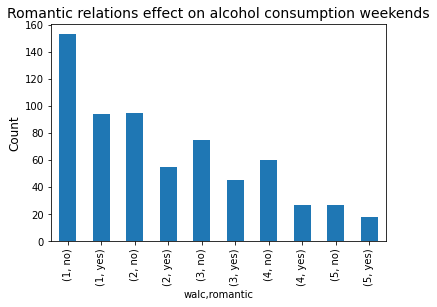

In [ ]:
# The effect of romantic involvement on alcoholism on weekends
# plot graph of 'Romantic' against weekend drinking
#
rom_1 = cr7_df.groupby(['walc', 'romantic'])['romantic'].count()
rom_1.plot.bar()
plt.title('Romantic relations effect on alcohol consumption weekends', fontsize=14)
plt.ylabel('Count', fontsize=12)
rom_1

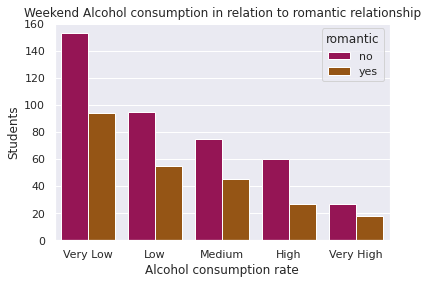

In [ ]:
#Alcohol consumption during the weekend in relation to romantic relationship
ax = sns.countplot(x="walc", hue="romantic",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title(  "Weekend Alcohol consumption in relation to romantic relationship");

dalc  romantic
1     no          289
      yes         162
2     no           75
      yes          46
3     no           32
      yes          11
4     no            7
      yes          10
5     no            7
      yes          10
Name: romantic, dtype: int64

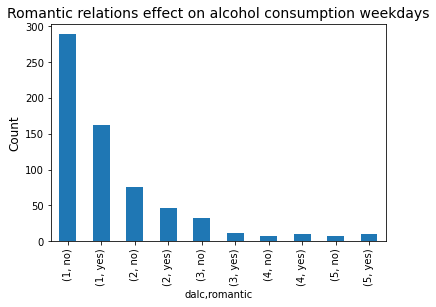

In [ ]:
# The effect of romantic involvement on alcoholism on weekdays
# plot graph of 'Romantic' against weekday drinking
#
rom_2 = cr7_df.groupby(['dalc', 'romantic'])['romantic'].count()
rom_2.plot.bar()
plt.title('Romantic relations effect on alcohol consumption weekdays', fontsize=14)
plt.ylabel('Count', fontsize=12)
rom_2


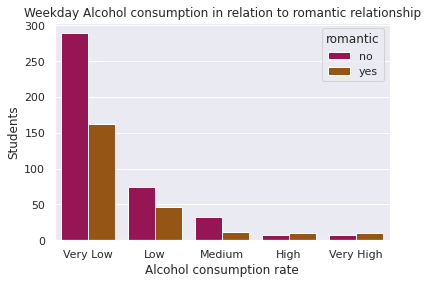

In [ ]:
#Alcohol consumption during the weekday in relation to romantic relationship
ax = sns.countplot(x="dalc", hue="romantic",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title(  "Weekday Alcohol consumption in relation to romantic relationship");

###*HIGHER STATUS vs ALCOHOL CONSUMPTION*

walc  higher
1     no         22
      yes       225
2     no         13
      yes       137
3     no         14
      yes       106
4     no         11
      yes        76
5     no          9
      yes        36
Name: higher, dtype: int64

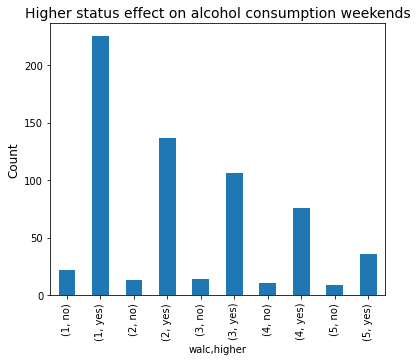

In [ ]:
# The effect of Higher status on alcohol consumption on weekends
# plot graph of 'Higher' against weekend drinking
#
high_1 = cr7_df.groupby(['walc', 'higher'])['higher'].count()
plt.figure(figsize=(6,5))
high_1.plot.bar()
plt.title('Higher status effect on alcohol consumption weekends', fontsize=14)
plt.ylabel('Count', fontsize=12)
high_1

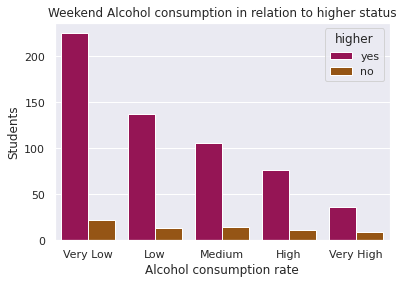

In [ ]:
#Alcohol consumption during the weekend in relation to higher status
ax = sns.countplot(x="walc", hue="higher",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title(  "Weekend Alcohol consumption in relation to higher status");

dalc  higher
1     no         37
      yes       414
2     no         18
      yes       103
3     no          6
      yes        37
4     no          3
      yes        14
5     no          5
      yes        12
Name: higher, dtype: int64

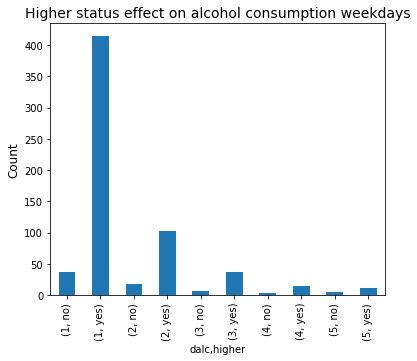

In [ ]:
# The effect of Higher status on alcohol consumption on weekdays
# plot graph of 'Higher' against weekday drinking
#
high_2 = cr7_df.groupby(['dalc', 'higher'])['higher'].count()
plt.figure(figsize=(6,5))
high_2.plot.bar()
plt.title('Higher status effect on alcohol consumption weekdays', fontsize=14)
plt.ylabel('Count', fontsize=12)
high_2

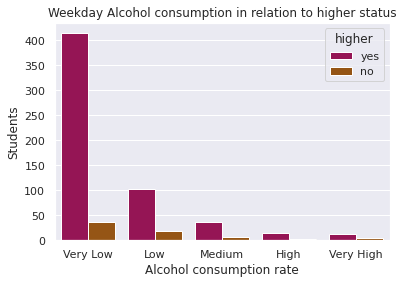

In [ ]:
#Alcohol consumption during the weekday in relation to romantic relationship
ax = sns.countplot(x="dalc", hue="higher",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title(  "Weekday Alcohol consumption in relation to higher status");

###*GOING OUT vs ALCOHOL CONSUMPTION*

In [ ]:
#getting information on the data in 'go out' column
cr7.go_out.describe()

count    649.000000
mean       3.184900
std        1.175766
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

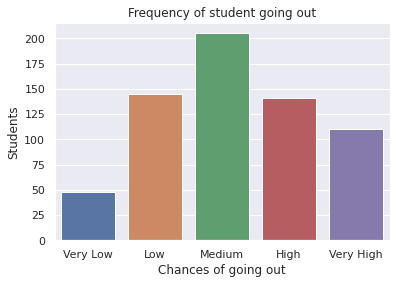

In [ ]:
##plot graph to check frequency of students going out
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="go_out", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Chances of going out")
plt.ylabel("Students")
plt.title("Frequency of student going out");

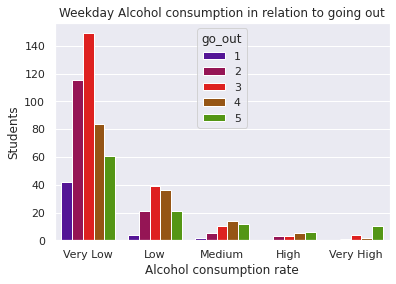

In [ ]:
#plot graph to check relationship between going out and weekday drinking
ax = sns.countplot(x="dalc", hue="go_out", palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to going out");

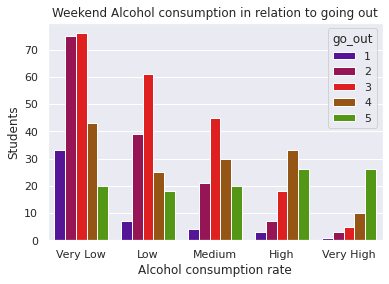

In [ ]:
#plot graph to check relationship between going out and weekend drinking
ax = sns.countplot(x="walc", hue="go_out",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to going out");

###*FAMILY RELATIONSHIP STATUS vs ALCOHOL CONSUMPTION*

Text(0.5, 1.0, 'Overview of family relationship')

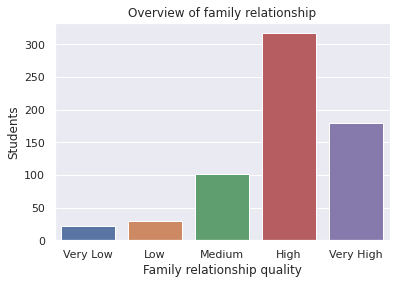

In [ ]:
#How do relations within the family of the student affect alcohol consumption 
#plot graph to check average status of family relationships 
#
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="fam_rel", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Family relationship quality")
plt.ylabel("Students")
plt.title("Overview of family relationship")

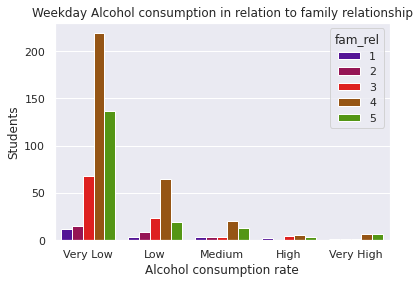

In [ ]:
#checking on the relationship between family relationship and weekday drinking
ax = sns.countplot(x="dalc", hue="fam_rel", palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to family relationship");

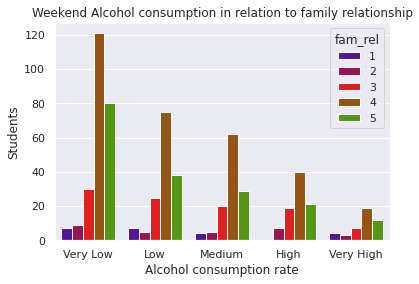

In [ ]:
#checking on the relationship between family relationship and weekend drinking
ax = sns.countplot(x="walc", hue="fam_rel",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to family relationship");

###*AVAILABLE FREE TIME vs ALCOHOL CONSUMPTION*

Text(0.5, 1.0, 'Overview of student free time')

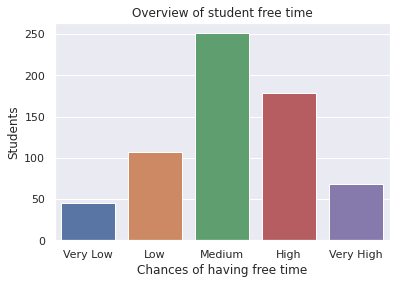

In [ ]:
#How does the free time available to the student affect alcohol consumption 
#Checking the relative available free time for the student
#
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="free_time", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Chances of having free time")
plt.ylabel("Students")
plt.title("Overview of student free time")

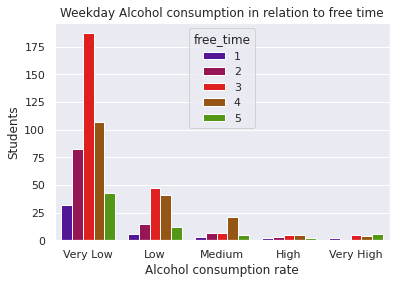

In [ ]:
#checking on the relationship between free time and weekday drinking
ax = sns.countplot(x="dalc", hue="free_time",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption rate")
plt.ylabel("Students")
plt.title("Weekday Alcohol consumption in relation to free time");

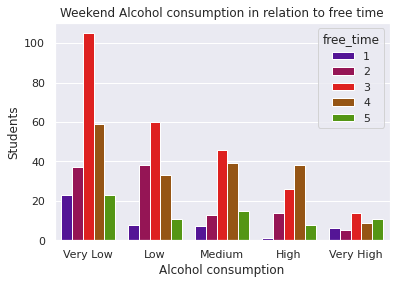

In [ ]:
#checking on the relationship between free time and weekend drinking
ax = sns.countplot(x="walc", hue="free_time",palette="brg", data=cr7)
ax.set_xlabel("")
ax.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Alcohol consumption")
plt.ylabel("Students")
plt.title("Weekend Alcohol consumption in relation to free time");

###*HIGHEST AND LOWEST PERFORMING STUDENTS*

In [ ]:
# Sort the data to find the best performing students and accompanying factors 
# parental status, family size, guardian, reason for going to school of 10 students with the highest grades
y = cr7.sort_values(by= "grade", ascending= 0)
y[["p_status", "fam_size", "reason", "guardian", "grade"]].head(10)

,p_status,fam_size,reason,guardian,grade
338,T,LE3,reputation,mother,18.67
617,T,LE3,course,father,18.00
349,T,GT3,reputation,father,18.00
594,T,GT3,reputation,mother,18.00
636,T,GT3,home,father,18.00
606,T,GT3,course,father,18.00
332,T,GT3,other,mother,18.00
596,T,GT3,course,mother,17.67
337,T,GT3,reputation,mother,17.67
549,T,GT3,course,mother,17.67


In [ ]:
# Sort the data to find the best performing students and accompanying factors 
# parental status, family size, guardian, reason for going to school of 10 students with the lowest grades
v = cr7.sort_values(by= "grade", ascending= 1)
v[["p_status", "fam_size", "reason", "guardian", "grade"]].head(10)

,p_status,fam_size,reason,guardian,grade
567,T,GT3,course,mother,1.33
603,A,LE3,reputation,mother,1.67
605,T,GT3,other,father,1.67
440,T,GT3,home,mother,2.33
563,T,GT3,course,mother,2.33
610,A,GT3,course,other,2.67
597,T,GT3,course,mother,3.00
626,T,GT3,other,father,4.00
639,T,GT3,other,mother,4.33
640,T,GT3,home,father,4.67
